In [124]:
# load data and consider two features (Economy..GDP.per.capita, Freedom) and the output to be estimated (Happiness.Score)
import csv

def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1  
              
    inputs =  [ [ 0 for _ in range(len(inputVariabNames))  ] for _ in range(len(data)) ]
    for j in range(len(inputVariabNames)):
        selectedVariable = dataNames.index(inputVariabNames[j])
        for i in range(len(data)): 
            inputs[i][j] = float(data[i][selectedVariable])
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs


import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

In [125]:
# check the liniarity
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def plot3Ddata(feature1, feature2, outputs):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = feature1
    y = feature2
    z = outputs

    ax.set_xlabel('GDP per capita')
    ax.set_ylabel('Freedom')
    ax.scatter3D(x, y, z, color = 'pink')

    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    # ax.legend()

In [126]:
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

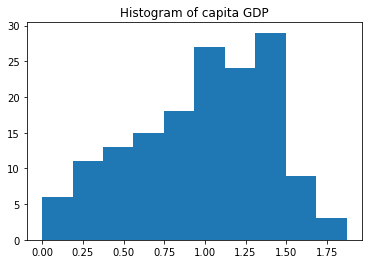

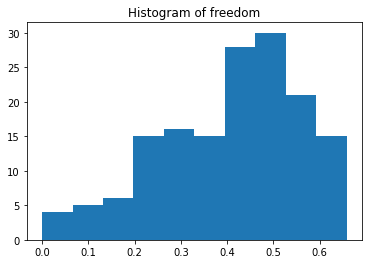

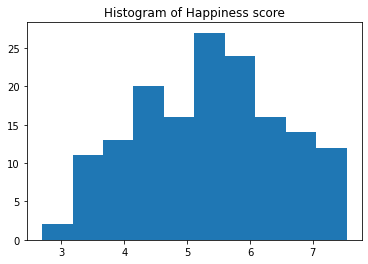

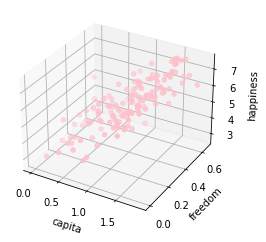

In [127]:
feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]
# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs)

In [128]:
from sklearn.preprocessing import StandardScaler
def normalisation(trainData, testData):
    scaler = StandardScaler()
    scaler.fit(trainData)  #  fit only on training data
    normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
    normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData



In [129]:
def plot3Ddata2(feat1Train, feat2Train, trainOutputs, feat1Valid, feat2Valid, vOutputs):
    fig = plt.figure()
    ax = plt.axes(projection = '3d')
    x = feat1Train
    y = feat2Train
    z = trainOutputs
    ax.scatter3D(x, y, z, color = 'pink', label = 'train')
    x2 = feat1Valid
    y2 = feat2Valid
    z2 = vOutputs
    ax.scatter3D(x2, y2, z2, color = 'cyan', label = 'validation')
    ax.legend()

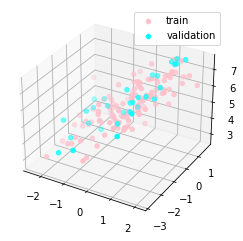

In [130]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

trainInputs, testInputs = normalisation(trainInputs, testInputs)

feature1Train = [line[0] for line in trainInputs]
feature2Train = [line[1] for line in trainInputs]
feature1Test = [line[0] for line in testInputs]
feature2Test = [line[1] for line in testInputs]

plot3Ddata2(feature1Train, feature2Train, trainOutputs, feature1Test, feature2Test, testOutputs)



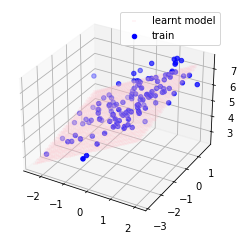

In [131]:
# identify (by training) the regressor

from sklearn import linear_model
regressor = linear_model.SGDRegressor(eta0 = 0.01)

noEpochs = 1000

for _ in range(noEpochs):
    regressor.partial_fit(trainInputs, trainOutputs)

#parameters of the liniar regressor
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

#numerical representation of the regressor model
noOfPoints = 50
xref1 = []
val = min(feature1Train)
step1 = (max(feature1Train) - min(feature1Train)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2Train)
step2 = (max(feature2Train) - min(feature2Train)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = feature1Train
y = feature2Train
z = trainOutputs

ax.scatter3D(xref1, xref2, yref, c = 'pink', marker = '_', label = 'learnt model', alpha = 0.2)
ax.scatter3D(x, y, z, color = 'b', label = 'train')
ax.legend()


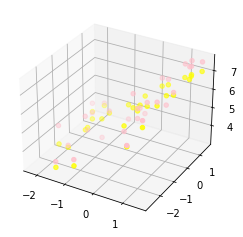

In [132]:
computedTestOutputs = regressor.predict(testInputs)

fig = plt.figure()
ax = plt.axes(projection = '3d')
x = [row[0] for row in testInputs]
y = [row[1] for row in testInputs]
z = testOutputs
ax.scatter3D(x, y, z, color = 'pink')
z2 = computedTestOutputs
ax.scatter3D(x, y, z2, color = 'yellow')

In [133]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):   ', error)

prediction error (tool):    0.2778484032165218
